# Survival analysis in Python

#### Installing LIFELINES library

In [1]:
# pip install lifelines

### Dataset to analyze
##### The data represent the survival in days since entry to the trial of patients with diffuse histiocytic lymphoma. 
##### Two different groups of patients are compared.
##### Censored observations are the patients still alive or died from an unrelated cause.

In [2]:
from lifelines.datasets import load_lymphoma

In [3]:
df = load_lymphoma()
df.head(7)   # first 7 observations from DataFrame

,Stage_group,Time,Censor
0,1,6,1
1,1,19,1
2,1,32,1
3,1,42,1
4,1,42,1
5,1,43,0
6,1,94,1


In [4]:
# Time - time/duration variable
# Censor - censoring binary variable representing whether the event was observed or not (censored observation)

In [5]:
df.describe()   #basic statistics

,Stage_group,Time,Censor
count,80.000000,80.000000,80.00000
mean,1.762500,121.475000,0.67500
std,0.428236,107.761454,0.47133
min,1.000000,4.000000,0.00000
25%,2.000000,31.750000,0.00000
50%,2.000000,83.500000,1.00000
75%,2.000000,208.000000,1.00000
max,2.000000,346.000000,1.00000


In [6]:
df['Stage_group'].value_counts()   # which disease stages are included in the data

2    61
1    19
Name: Stage_group, dtype: int64

In [7]:
df['Censor'].value_counts()   # what is the ratio of censored observations?

1    54
0    26
Name: Censor, dtype: int64

In [8]:
from lifelines.plotting import plot_lifetimes

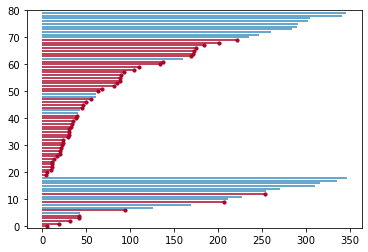

In [9]:
ax = plot_lifetimes(df['Time'], event_observed=df['Censor'])   # visualization of the data, right-censored observations

### Nonparametric survival models

#### Kaplan-Meier method

In [10]:
from lifelines import KaplanMeierFitter

In [11]:
kmf = KaplanMeierFitter()
kmf.fit(df['Time'], event_observed=df['Censor'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 80 total observations, 26 right-censored observations>

In [12]:
kmf.survival_function_   # survival function estimates
# There is 95% probability that the event has not occurred yet at time 10

,KM_estimate
timeline,
0.0,1.000000
4.0,0.987500
6.0,0.962500
10.0,0.950000
11.0,0.912500
...,...
316.0,0.272364
335.0,0.272364
341.0,0.272364


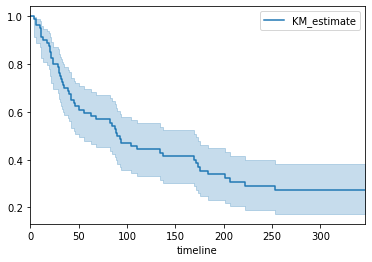

In [13]:
kmf.plot_survival_function()

In [14]:
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
4.0,0.012500
6.0,0.037500
10.0,0.050000
11.0,0.087500
...,...
316.0,0.727636
335.0,0.727636
341.0,0.727636


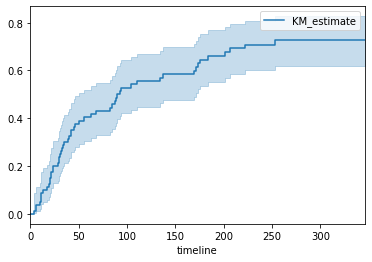

In [15]:
kmf.plot_cumulative_density()

In [16]:
#Median survival time represents when for 50% of the population the event occured

In [17]:
from lifelines.utils import median_survival_times

In [18]:
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

In [19]:
print(median_, median_confidence_interval_)

90.0      KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    50.0                   171.0


In [20]:
#Stratification

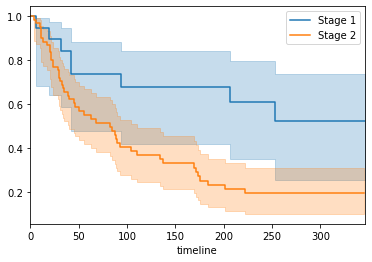

In [21]:
groups = df['Stage_group']
ix = (groups == 1)

kmf.fit(df['Time'][ix], df['Censor'][ix], label='Stage 1')
ax = kmf.plot_survival_function()

kmf.fit(df['Time'][~ix], df['Censor'][~ix], label='Stage 2')
ax = kmf.plot_survival_function(ax=ax)

In [22]:
from lifelines.statistics import logrank_test

In [23]:
test_results = logrank_test(df['Time'][ix], df['Time'][~ix], df['Censor'][ix], df['Censor'][~ix], alpha=.9)
test_results.print_summary()
# P-value = 0.01 - we should reject the null hypothesis of no difference in survival between the given two groups

#### Nelson-Aalen method

In [24]:
from lifelines import NelsonAalenFitter

In [25]:
naf = NelsonAalenFitter()
naf.fit(df['Time'], event_observed=df['Censor'])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 80 total observations, 26 right-censored observations>

In [26]:
naf.cumulative_hazard_   # instead of survival_function in kmf

,NA_estimate
timeline,
0.0,0.000000
4.0,0.012500
6.0,0.037979
10.0,0.050966
11.0,0.090970
...,...
316.0,1.281192
335.0,1.281192
341.0,1.281192


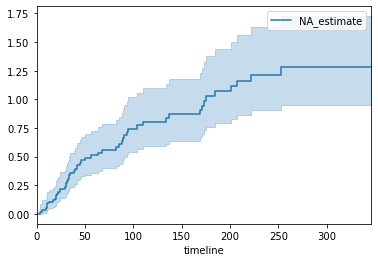

In [27]:
naf.plot_cumulative_hazard()

In [28]:
naf.median_survival_time_    # still many options not implemented

NotImplementedError: 